# KNN
- Classification / Regression
- Lazy learner, does not need to learn a model
- Can be slow on large datasets
- Need to choose the right k value
- Suffers from curse of dimensionality 

- low values of k can be noisy and subject to outliers
- large values of k smooth over things, don't want it to be so large that category iwth few samples will always be out votes by other categories

- The assumption is that similar inputs have similar outputs
- Classification: For a etst input x, we assign the most common label amongst its k most similar training inputs
- Set of the k nearest neighbours of x as S_x
- S_x belongs to D st |S_x| = k and for all (x',y') in D\S_x, dist(x,x') ≥ max(x",y" in Sx) dist(x, x")

- Classifier h(x) = mode({y":(x", y") in S_x})

- KNN fundamentally relies on a distance metric
- Most popular is Minknowski distance 
dist(x,z) = (sum(xr-zr)^p)^(1/p)
p = 1, Manhattan distance (l1 norm)
p = 2, Euclidean Distance (l2 norm)
p = 0, Hamming distance (logical and)
- Bayes optimal classifier, suppose you knew P(y|x), best prediction y* is the one that maximizes P(y|x)
- 1-NN Convergence proof: as n->inf hte 1-NN error is no more than twice the error of the Bayes Optimal classifier.

Imagine X = [0,1]^d (bit strings of length d)
k = 10
Training data is sampled uniformly with X 

- l edge length of the smallest hypercube that contains all k nearest neighbour of a test point.
- l^d is approximately (k/n)^(1/d)
- if n = 1000 how big is l? for d = 2, 0,1, but for d=100 0.955
- So with high dimensions, even to capture just say 10 neighbours, you must search almsot the entire space.
- So as the data becomes sparse, nearnest neighbours become meaningless bevause everything is far away.

During the "fit" step, KNN stores all the training data and hte curresponding labels. No distances are calculated at this point.
During predict, it calcualtes hte distances between that point and every single point in the training set, kinds k neighbours, examines their labels, and goes for the mode.

There are no parameters, so no gradient descent, no optimization.
It's non-parametrix, so can adapt to complex patterns.

Feature scaling is important since it is distance based.

Smaller k - tighter "fit"
- isn't a good choice for large datasets, because time complexity is exponential

It data has local smoothness or patterns, it is good for regression.
If class boundaries are non linear, it is good for classification.

- For prediction, for each test point, time is O(n*d), n is number of training points, d is number of features.
- For categorical unordered data, hamming distance. If ordered map to integers and use Minkowski distance. Gower distance for mixed data.
- can use a hybrid or custom distance 
- for histograms KL divergence

# KNN Classifier

In [5]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
iris = datasets.load_iris()


In [7]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [10]:
X, y = iris.data, iris.target

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
iris_df['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']>

In [18]:
iris_df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [20]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<Axes: xlabel='species'>

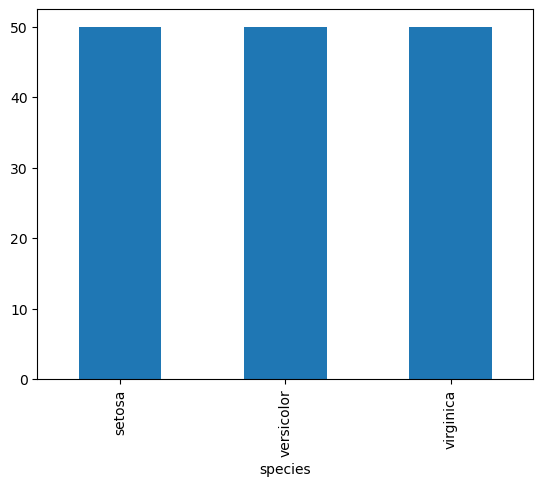

In [21]:
iris_df['species'].value_counts().plot(kind='bar')

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

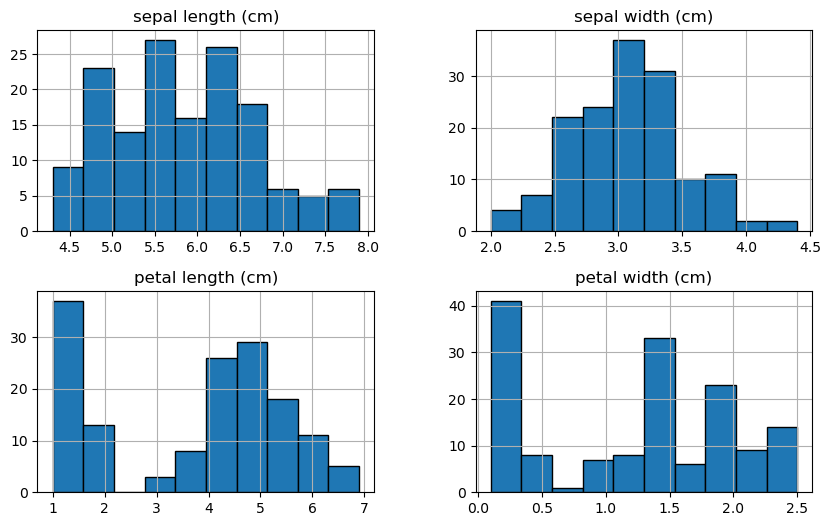

In [22]:
iris_df.hist(figsize=(10,6), edgecolor='black')

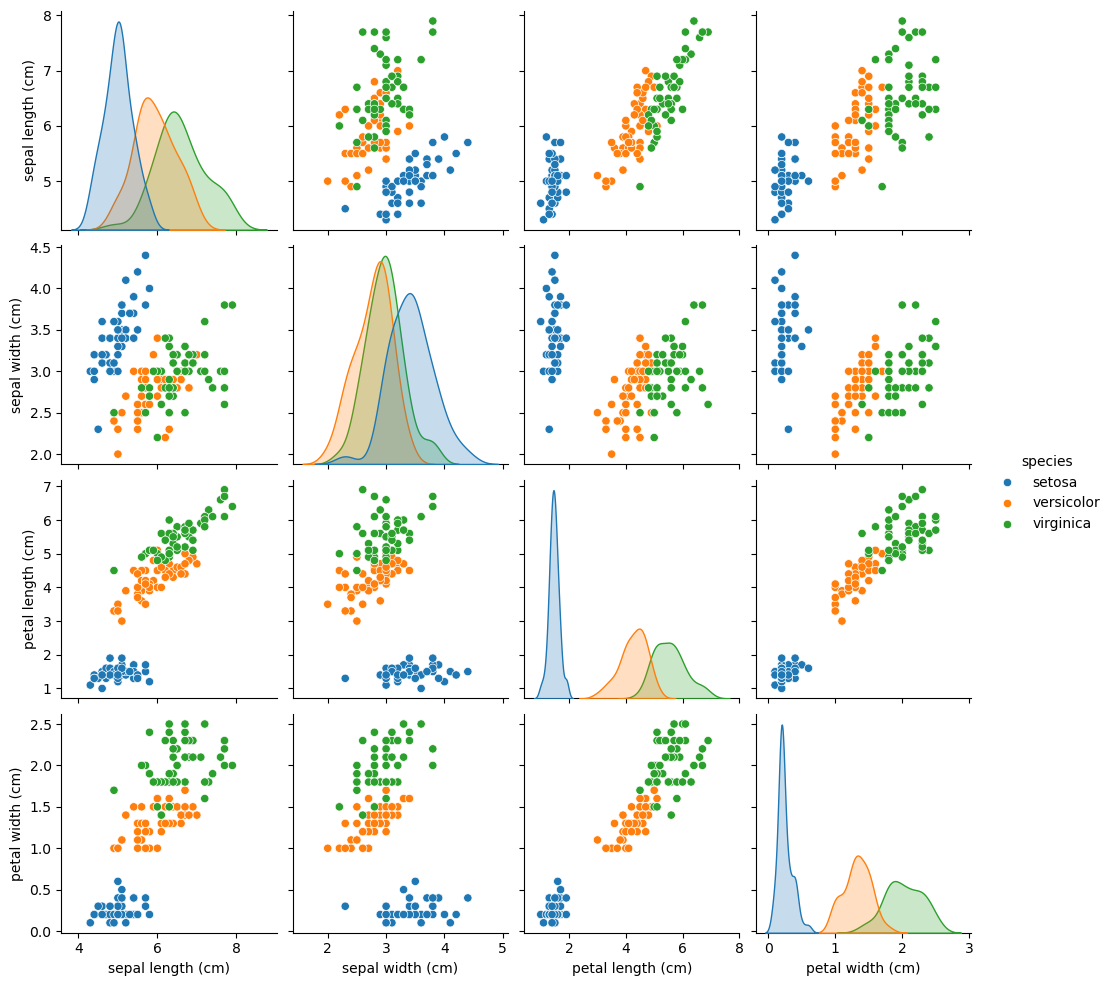

In [23]:
sns.pairplot(iris_df, hue='species')

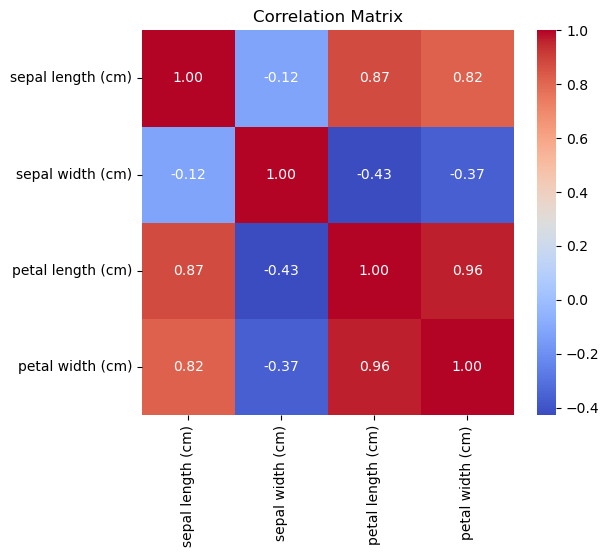

In [24]:
corr = iris_df.drop('species', axis=1).corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

In [26]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors' : list(range(1,31)),
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance']
}

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # can use f1_macro , precision, recall etc.
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [29]:
dir(grid)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'knn__n_neighbors': 17, 'knn__p': 2, 'knn__weights': 'distance'}
0.975


In [60]:
results = pd.DataFrame(grid.cv_results_)
mask = (results['param_knn__p'] == 2) & (results['param_knn__weights'] == 'distance')
subset = results[mask]

In [61]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007320,0.001771,0.112752,0.014151,1,1,uniform,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__wei...",-0.771929,-0.744713,-0.747549,-0.782883,-0.774204,-0.764256,0.015270,117
1,0.006451,0.001858,0.129966,0.020454,1,1,distance,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__wei...",-0.771929,-0.744713,-0.747549,-0.782883,-0.774204,-0.764256,0.015270,117
2,0.007374,0.002556,0.084370,0.010504,1,2,uniform,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__wei...",-0.815301,-0.774140,-0.790348,-0.823105,-0.814967,-0.803572,0.018385,119
3,0.006481,0.002788,0.103422,0.044081,1,2,distance,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__wei...",-0.815301,-0.774140,-0.790348,-0.823105,-0.814967,-0.803572,0.018385,119
4,0.004351,0.000348,0.157309,0.021012,2,1,uniform,"{'knn__n_neighbors': 2, 'knn__p': 1, 'knn__wei...",-0.685578,-0.652000,-0.676934,-0.674427,-0.676413,-0.673071,0.011210,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009185,0.005023,0.179194,0.015169,29,2,distance,"{'knn__n_neighbors': 29, 'knn__p': 2, 'knn__we...",-0.658523,-0.632906,-0.643579,-0.639118,-0.652338,-0.645293,0.009156,95
116,0.007269,0.001703,0.283468,0.016499,30,1,uniform,"{'knn__n_neighbors': 30, 'knn__p': 1, 'knn__we...",-0.631960,-0.606854,-0.616336,-0.611648,-0.624511,-0.618262,0.008992,53
117,0.007351,0.003870,0.303091,0.048345,30,1,distance,"{'knn__n_neighbors': 30, 'knn__p': 1, 'knn__we...",-0.624640,-0.599854,-0.608665,-0.604912,-0.617171,-0.611048,0.008842,41
118,0.007210,0.001605,0.180949,0.008346,30,2,uniform,"{'knn__n_neighbors': 30, 'knn__p': 2, 'knn__we...",-0.666340,-0.642273,-0.652125,-0.646850,-0.659413,-0.653400,0.008625,109


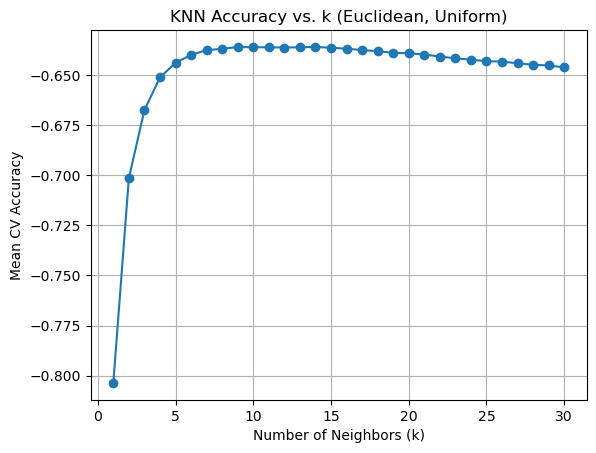

In [62]:
plt.plot(subset['param_knn__n_neighbors'], subset['mean_test_score'], marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("KNN Accuracy vs. k (Euclidean, Uniform)")
plt.grid(True)
plt.show()

cv accuracy : average performace over cv folds
gridsearchcv: tries all and picks best
elbow method: visually inspect performance vs k
lower k = lower bias higher variance, higher k - more bias, lower variance

Bias: Error from wrong assumptions (underfitting)
Variance: Error from model sensitivity to small fluctuations in the training set (overfitting)
Small k: Low bias, fits the training data closesly, but sensitive to noise,large k: high bias, generalizes well but may underfit

Uniform weights: all k neighbours contribute equally
Distance weights: closer neighbours have more influence, weight = 1/distance


In [34]:
results = pd.DataFrame(grid.cv_results_)[[
    'param_knn__n_neighbors', 'param_knn__p', 'param_knn__weights', 'mean_test_score'
]]

print(results.sort_values(by='mean_test_score', ascending=False).to_string(index=False))


 param_knn__n_neighbors  param_knn__p param_knn__weights  mean_test_score
                     18             2           distance         0.975000
                     27             1           distance         0.975000
                     23             1           distance         0.975000
                     20             2           distance         0.975000
                     17             2           distance         0.975000
                     24             1           distance         0.975000
                     26             1           distance         0.975000
                     25             1           distance         0.975000
                     19             2           distance         0.975000
                     28             1           distance         0.975000
                     29             1           distance         0.975000
                     30             1           distance         0.975000
                     11             2 

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'knn__n_neighbors': randint(1, 31),
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist,
                                   n_iter=30, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best parameters (random search):", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)


Best parameters (random search): {'knn__n_neighbors': 24, 'knn__p': 1, 'knn__weights': 'distance'}
Best CV accuracy: 0.975


In [36]:
print(id(grid.estimator))          # ID of pipeline inside grid
print(id(random_search.estimator))       # Different object
print(grid.estimator.named_steps['knn'] is random_search.estimator.named_steps['knn']) 


5631945040
5631945040
True


In [37]:
print("Test accuracy (grid search):", grid.score(X_test, y_test))
print("Test accuracy (random search):", random_search.score(X_test, y_test))

Test accuracy (grid search): 0.9666666666666667
Test accuracy (random search): 0.9333333333333333


In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
cal_housing = fetch_california_housing()
X, y = cal_housing.data, cal_housing.target
feature_names = cal_housing.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
df = pd.DataFrame(X_train, columns=feature_names)
df['target_price'] = y_train
print(df.head())
print(df.shape)
print(df.isnull().sum())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
1  3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
2  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
3  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
4  3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

   Longitude  target_price  
0    -117.03         1.030  
1    -118.16         3.821  
2    -120.48         1.726  
3    -117.11         0.934  
4    -119.80         0.965  
(16512, 9)
MedInc          0
HouseAge        0
AveRooms        0
AveBedrms       0
Population      0
AveOccup        0
Latitude        0
Longitude       0
target_price    0
dtype: int64


In [49]:
correlations = df.corr()


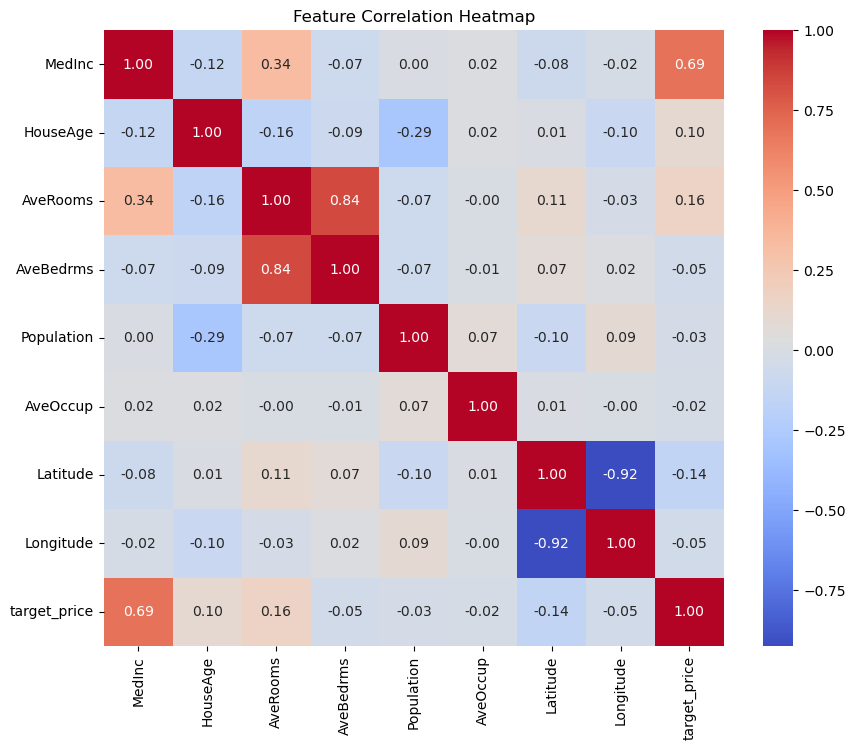

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

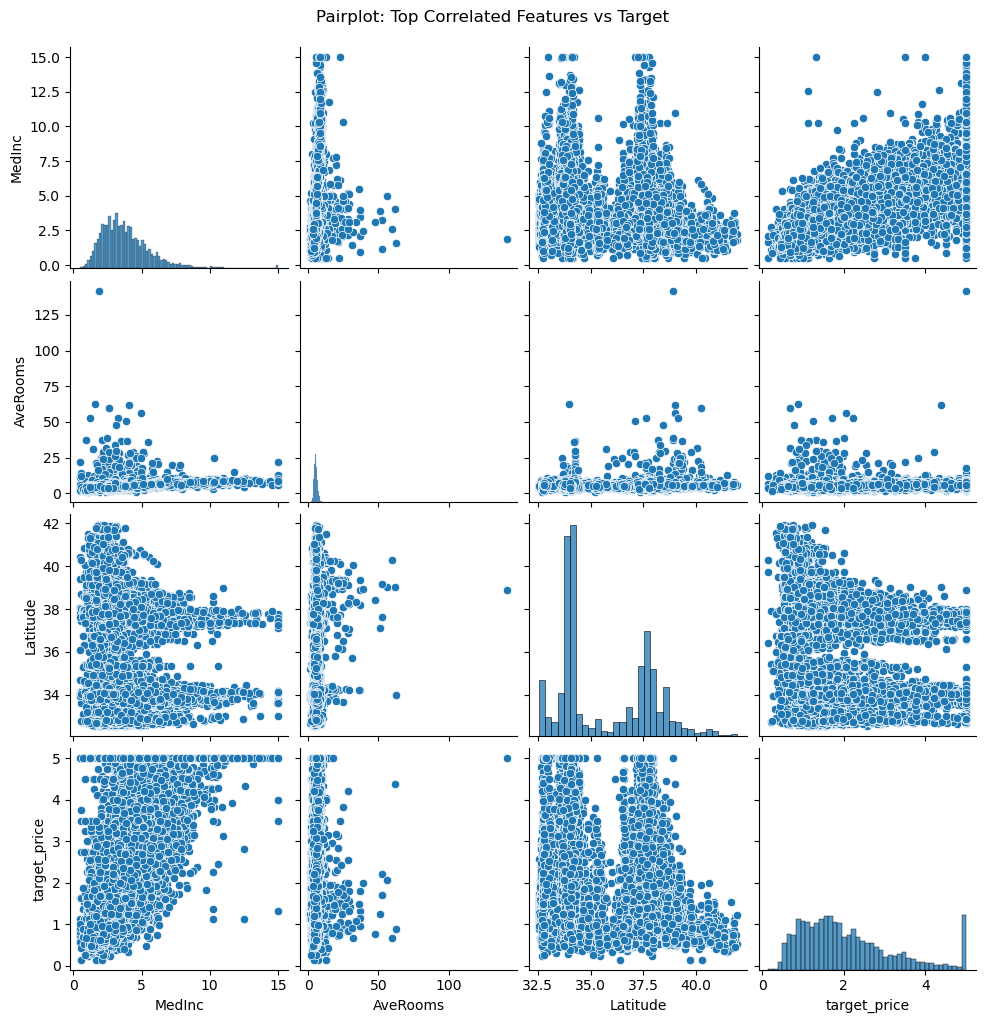

In [52]:
top_corr_features = correlations['target_price'].abs().sort_values(ascending=False).index[1:4]
sns.pairplot(df[top_corr_features.to_list() + ['target_price']])
plt.suptitle("Pairplot: Top Correlated Features vs Target", y=1.02)
plt.show()

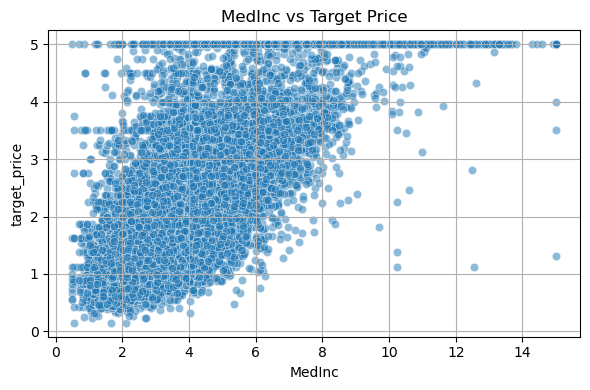

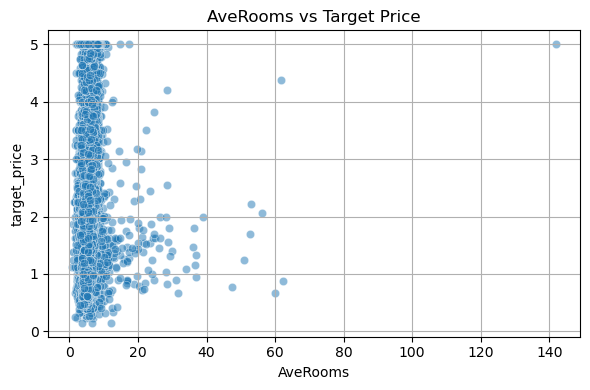

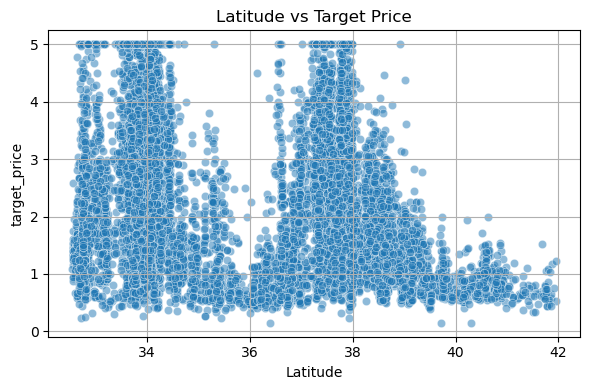

In [53]:
for feature in top_corr_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=feature, y='target_price', data=df, alpha=0.5)
    plt.title(f"{feature} vs Target Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [40]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])


In [41]:
param_grid = {
    'knn__n_neighbors': list(range(1, 31)),
    'knn__p': [1, 2], 
    'knn__weights': ['uniform', 'distance']
}


In [42]:
grid = GridSearchCV(
    pipeline, param_grid, cv=5,
    scoring='neg_root_mean_squared_error',  # or use neg_mean_squared_error
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [43]:
y_pred = grid.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Best Parameters:", grid.best_params_)
print(" RMSE on Test Set:", rmse)
print("R^2 Score on Test Set:", r2)


 Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
 RMSE on Test Set: 0.6034489607162036
R^2 Score on Test Set: 0.72210916268423


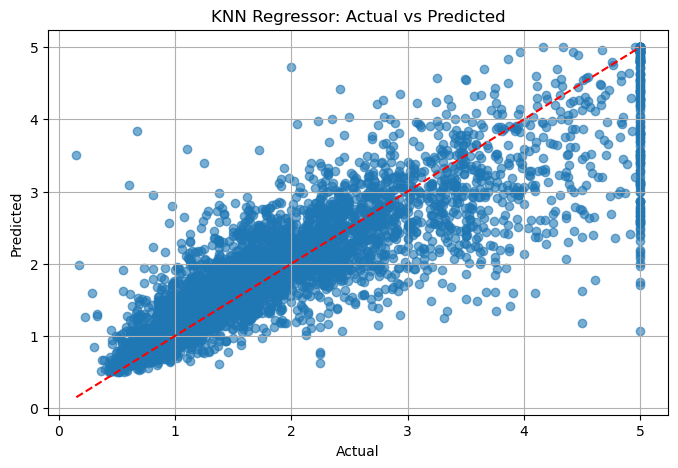

In [44]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()
